---
# Advanced Financial Econometrics
## PhD seminar reading group

#### Winter Semester 2019/2020

#### Week 4 (Nove 6 2019): Chapter 4

by Lukas, Marek and Nicolas

in Python

---

Have a look here: 10 important papers to get started with machine learning: https://medium.com/@matthiasbitzer94/10-important-papers-to-get-started-with-machine-learning-66fc88a39e71

## 1.Intro: Deep Feedforward Networks

We can find **deep feedforward networks** also under other names such as **feedforward neural networks** or **multilayer perceptrons (MLPs)**.

A feedforward network deﬁnes a mapping $\mathbf{y} = f(\mathbf{x}; \mathbf{\theta})$ and learns the value of the parameters $\mathbf{\theta}$ that result in the best function approximation of some function $f^{*}$.

When feedforward neural networks are extended to include feedback connections, they are called **recurrent neural networks**. Feedforward form the basis of many important commercial applications. **Convolutional networks** used for object recognition from photos are aspecialized kind of feedforward network. Feedforward networks are a conceptual stepping stone on the path to **recurrent networks**, which power many naturallanguage applications

Feedforward neural networks are called **networks** because they are typically represented by composing together many diﬀerent functions.
Let's have three functions $f^{(1)}$, $f^{(2)}$, and $f^{(3)}$ connected in a chain, to form $f(\mathbf{x}) = f^{(3)}(f^{(2)}(f^{(1)}(\mathbf{x})))$ These chain structures are the most commonly used structures of neural networks. In this case, $f^{(1)}$ is called the **ﬁrst layer** of the network, $f^{(2)}$ is called the **second layer**, and so on. The overall length of the chain gives the **depth** of the model. The ﬁnal layer ($f^{(3)}$) of a feedforward network is called the **output layer**. 

During neural network training, we drive $f(\mathbf{x})$ to match $f^*(\mathbf{x})$. The learning algorithm must decide how to use the layers to produce the desired output, but the training data do not say what each individual layer should do. Since the training data does not show the desired output for each of these layers, these are called **hidden layers**.

Each hidden layer of the network is typically vector valued. The dimensionality of these hidden layers determines the **width** of the model. Rather than thinking of the layer as representing a single vector-to-vector function, we can also think of the layer as consisting of many **units** that act in parallel, each representing a vector-to-scalar function



One way to understand feedforward networks is to begin with linear models and consider how to overcome their limitations.
* Linear models can be ﬁt eﬃciently and reliably
* Linear models have the obvious defect that the model capacity is limited to linear functions 
	$\Rightarrow$ the model cannot understand the interaction between any two input variables

To extend linear models to represent nonlinear functions of $\mathbf{x}$, we can apply the linear model not to $\mathbf{x}$ itself but to a transformed input $\phi(\mathbf{x})$, where $\phi$ is a nonlinear transformation. We can think of $\phi$ as providing a set of features describing $\mathbf{x}$, or as providing a new representation for $\mathbf{x}$. So how shall we choose the mapping $\phi$?
* We can se a very generic $\phi$, such as the inﬁnite-dimensional $\phi$ that is implicitly used by kernel machines
* Ingeneer $\phi$ manually (too much human effort).
* Use deep learning to learn $\phi$ 

$$y = f(\mathbf{x};\mathbf{\theta},\mathbf{w} = \phi (\mathbf{x}; \mathbf{\theta})^\intercal \mathbf{w})$$

We now have parameters $\mathbf{\theta}$ that we use to learn $\phi$ from a broad class of functions, and parameters $\mathbf{w}$ that map from $\phi(\mathbf{x})$ to the desired output.

## 6.1: Example: Learning XOR

Prensenting an example how neural networks can overcome the weaknesses of linear models. The XOR function (“exclusive or”) is an operation on two binary values, $x_1$ and $x_2$. When exactly one of these binary values is equal to 1, the XOR function returns 1. Otherwise, it returns 0.

Let's assume we want to learn the XOR function as depicted below.
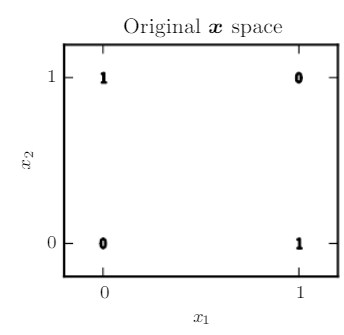

The bold numbers printed on the plot indicate the value that the learned function must output at each point.

**Linear model solution**

We can treat this problem as a regression problem and use a mean squared error loss function. However the model would put 0.5 everywhere.

**Feedforward network solution**

We must use a nonlinear function to describe the features. Let's design a solution as shown on the schema below:

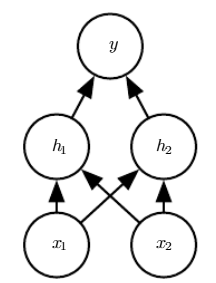

We will have a single hidden layer containing two units.

Most neural networks do so using an aﬃne transformation controlled by learned parameters, followed by a ﬁxed nonlinear function called an activation function. We do it here by defining $\mathbf{h} = g(\mathbf{W}^\intercal \mathbf{x} + \mathbf{c})$, where $\mathbf{W}$ provides the weights of a linear transformation and $\mathbf{c}$ the biases. The activation function g is typically chosen to be a function that is **applied element-wise** $h_i = g(\mathbf{x}^\intercal \mathbf{W}_{:,i} + c_i)$. In modern neural networks, the default recommendation is to use the **rectiﬁed linear unit**, or ReLU: , deﬁned by the activation function $g(z) = max\{0, z\}$.

This leads us to the following formula for our network:

$$f(\mathbf{x};\mathbf{W}, \mathbf{c}, \mathbf{w}, b) = \mathbf{w}^\intercal \text{max}\{0, \mathbf{W}^\intercal \mathbf{x} + \mathbf{c}\} + b$$


We can then specify one of the solutions as follows:
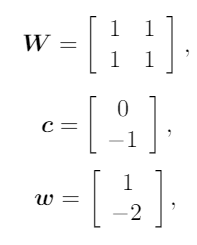
and $b = 0$

First lets define all the possible imputs: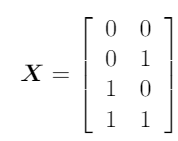


The ﬁrst step in the neural network is to multiply the input matrix by the ﬁrst layer’s weight matrix:

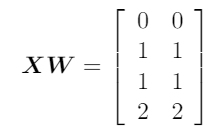

Next, we add the bias vector $\mathbf{c}$, to obtain
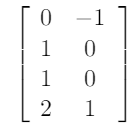

To ﬁnish computing the value of $h$ for each example, we apply the rectiﬁed linear transformation:

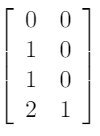

We ﬁnish with multiplying by the weight vector $\mathbf{w}$:

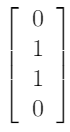

## 6.2: Gradient-Based Learning

Designing and training a neural network is not much diﬀerent from training any other machine learning model with gradient descent. 

The largest diﬀerence between the linear models we have seen so far and neural networks is that the **nonlinearity** of a neural network causes most interesting **loss functions to become nonconvex**.

This means that neural networks are usually trained by using iterative, gradient-based optimizers that merely drive the cost function to a very low value, rather than the linear equation solvers used to train linear regression models or the convex optimization algorithms with global convergence guarantees used to train logistic regression or SVMs.

Stochastic gradient descent applied to nonconvex loss functions has no such convergence guarantee and is sensitive to the values of the initial parameters.

For feedforward neural networks, it is important to initialize all weights to small random values. The biases may be initialized to zero or to small positive values.

**Cost Functions**

In most cases, our parametric model deﬁnes a distribution $p(\mathbf{y} | \mathbf{x};\mathbf{\theta})$ and we simply use the principle of maximum likelihood. This means we use the cross-entropy between the training data and the model’s predictions as the cost function.

The total cost function used to train a neural network will often combine one of the primary cost functions described here with a regularization term.

**Learning Conditional Distributions with Maximum Likelihood**

Most modern neural networks are trained using maximum likelihood. This means that the cost function is simply the negative log-likelihood, equivalently described as the cross-entropy between the training data and the model distribution.

$$J(\theta) = - E_{\mathbf{x,y} \sim \hat{p}_{data}} \text{log }p_{\text{model }}(\mathbf{y}|\mathbf{x})$$

An advantage of this approach of deriving the cost function from maximum likelihood is that it removes the burden of designing cost functions for each model.

One recurring theme throughout neural network design is that the gradient ofthe cost function must be large and predictable enough to serve as a good guide for the learning algorithm. Functions that saturate (become very ﬂat) underminethis objective because they make the gradient become very small. In many cases this happens because the activation functions used to produce the output of the hidden units or the output units saturate. The negative log-likelihood helps to avoid this problem for many models.

One unusual property of the cross-entropy cost used to perform maximum likelihood estimation is that it usually does not have a minimum value when applied to the models commonly used in practice.

**Learning Conditional Statistics**


**Output Units**

**Linear Units for Gaussian Output Distributions**

One simple kind of output unit is based on an aﬃne transformation with no nonlinearity. These are often just called linear units.

Linear output layers are often used to produce the mean of a conditional Gaussian distribution:
$ \mathbf{\hat{y}}=\mathbf{W}^\intercal \mathbf{h} + \mathbf{b} $

Maximizing the log-likelihood is then equivalent to minimizing the mean squared error.

**Sigmoid Units for Bernoulli Output Distributions**

Many tasks require predicting the value of a binary variabley. Classiﬁcation problems with two classes can be cast in this form. 

Suppose we use the following output function:

$P (y = 1 | \mathbf{x}) = max\{0, min\{1, \mathbf{w}^\intercal \mathbf{h} + b\}\} $

Any time that $\mathbf{w}^\intercal \mathbf{h} + b $ stayed outside the unit interval, the gradient of the output of the model with respect toits parameters would be ), which would cause troubles (there would be no further guide for the learning algorithm to improve, it would get stuck). Using the sigmoid function ensure the algorithm does not reach the zero value.

$ \mathbf{\hat{y}}=\mathbf{\sigma} (\mathbf{w}^\intercal \mathbf{h} + b $)

The loss function for maximum likelihood learning of a Bernoulli parametrized by a sigmoid is:
$$J(\mathbf{\theta}) = / \text{log } P(y| \mathbf{x})$$
    $$ = \text{log } \sigma ((2y-1)z)$$
    $$ = \zeta((1-2y)z)$$
    
By rewriting the loss in terms of the softplus function, we can see that it saturates only when $\zeta((1-2y)z)$ is very negative. Saturation thus occurs only when the model already has the right answer.


**Softmax Units for Multinoulli Output Distributions**

Softmax functions are most often used as the output of a classiﬁer, to represent the probability distribution over **n** diﬀerent classes. 

To generalize to the case of a discrete variable with n values, we now need to produce a vector $\hat{y}$, with $\hat{y}_i = P(y = i| \mathbf{x})$. We require not only that each element of $\hat{y}_i$ be between 0 and 1, but also that the entire vector sums to 1 so that it represents a valid probability distribution. The same approach that worked forthe Bernoulli distribution generalizes to the multinoulli distribution. First, a linear layer predicts unnormalized log probabilities:

$ \mathbf{z}=\mathbf{W}^\intercal \mathbf{h} + \mathbf{b} $

where $\hat{z}_i = log \tilde{P}(y = i| \mathbf{x})$ The softmax function can then exponentiate and normalize $\mathbf{z}$ to obtain the desired $\mathbf{\hat{y}}$. Formally, the softmax function is given by

$softmax(z)_i = \frac{exp(z_i)}{\sum _j exp(z_j)}$

As with the logistic sigmoid, the use of the exp function works well when training the softmax to output a target value y using maximum log-likelihood. Inthis case, we wish to maximize $\text{log} {P}(y = i| \mathbf{z}) = \text{log softmax }(\mathbf{z})_i$. Deﬁning the softmax in terms of exp is natural because the login the log-likelihood can undo the exp of the softmax:

$\text{log softmax } (\mathbf{z})_i = z_i - \text{log } \sum _j \text{exp }(z_{j})$

Like the sigmoid, the softmax activation can saturate. The sigmoid functionhas a single output that saturates when its input is extremely negative or extremelypositive. 


**Other Output Types**

The linear, sigmoid, and softmax output units described above are the most common. Neural networks can generalize to almost any kind of output layer that we wish. The principle of maximum likelihood provides a guide for how to design a good cost function for nearly any kind of output layer. In general, if we deﬁne a conditional distribution $p(\mathbf{y} | \mathbf{x};\mathbf{\theta})$ , the principle ofmaximum likelihood suggests we use $-\text{log }p(\mathbf{y} | \mathbf{x};\mathbf{\theta})$  as our cost function.

In general, we can think of the neural network as representing a function $f(\mathbf{x};\mathbf{\theta})$.The outputs of this function are not direct predictions of the value y. Instead, $f(\mathbf{x};\mathbf{\theta}) = \mathbf{\omega}$ provides the parameters for a distribution over y. Our loss functioncan then be interpreted as $-\text{log }p(\mathbf{y} | \mathbf{x};\mathbf{\omega}(\mathbf{x}))$.

# 6.3 Hidden Units

- choosing types of hidden units is difficult, the theory behind it is still being developped
- the choice is often made by trial and error
- general recommendation: use rectified linear units
- most units perform a nonlinear transformation on an affine transformation of inputs: $$g(\mathbf{z}) = g(\mathbf{W^T}\mathbf{x} + \mathbf{b})$$
- the units usually differ only in the choice of *g*
- using functions differentiable everywhere is good for gradient-based search of optimal parameters of the network, but often it is sufficient that the function is differentiable almost everywhere (because the gradient-based learning algorithm doesn't usually converge precisely at the local/global minima, but only close to it)
- if the function has left and right derivatives defined, most implementations of learning algorithms will work with one of the one-sided derivatives instead of raising an error
- computations are subject to numerical errors anyway

## 6.3.1 Rectified Linear Units and Their Generalizations

### Rectified Linear Unit

- $$g(z) = max(\{0, z\})$$
- whenever the unit is active, the derivative is *1* which leads to easier gradient-based optimization
- a good practice is to initialize *b* with small positive values which increases the chances that the units will be active at the beginning of optimization

- when rectified linear units aren't active, the algorithm doesn't learn, hence many generalizations aim at introducing non-zero gradients almost everywhere
- most generalizations of rectified linear units perform comparably and perform better only in specific applications

### Absolute Value Rectification

- $$g(z) = \mid z\mid$$
- used e.g. for recognition of objects on images

### Leaky Rectified Linear Unit

- $$g(z) = max(\{0, z\}) + \alpha * min(\{0, z\}), \alpha \neq 0$$
- &\alpha& set to a small positive value

### Parametric Rectified Linear Unit

- $$g(z) = max(\{0, z\}) + \alpha * min(\{0, z\}), \alpha \neq 0$$
- the value of $\alpha$ is optimized by the learning algorithm

### Maxout Units

- $$h_i(z) = max_{j \in G^{(i)}}z_{ij})$$
- a maxout unit can learn to approximate any convex function with arbitrary precision
- contains more parameters and hence requires more regularization
- helps avoid *catastrophic forgetting*


## 6.3.2 Logistic Sigmoid and Hyperbolic Tangent

### Logistic Sigmoid

- $$g(z) = \sigma(z)$$

### Hyperbolic Tangent

- $$g(z) = tanh(z)$$

- when a sigmoidal activation function must be used, the hyperbolic tangent activation function typically performs better than the logistic sigmoid because it is more close to the identity function and hence the training is easier

- sigmoidal activation functions are more common in settings other than feedforward networks because some of the additional requirements rule out the use of piecewise linear activation functions

## 6.3.3 Other Hidden Units

- hidden unit design remains an active area of research and many useful hidden unit types remain to be discovered
- other types of hidden units are possible, but are used less frequently
- many unpublished activation functions perform just as well as the popular ones
- usually new hidden unit types are published only if they are clearly demonstrated to provide a significant improvement

### Identity

### Linear Functions

- if only linear transformations are used, the whole network becomes a linear model
- linear functions can help decrease the overall number of parameters

### Softmax Unit

- may be used when we want the layer to output a categorical variable

### Radial Basis Function

- because it saturates to 0 for most *x*, it can be difficult to optimize

### Soflplus

- a smooth version of the rectifier
- the use of the softplus is generally discouraged
- one might expect it to have an advantage over the rectifier due to being differentiable everywhere or due to saturating less completely, but empirically it does not

### Hard Tanh

- this is shaped similarly to the tanh and the rectifier but unlike the latter, it is bounded

# 6.4 Architecture Design

- we need to consider the depth of the network and the width of each layer
- most neural network architectures arrange these layers in a chain structure, with each layer being a function of the layer that preceded it
- a network with even one hidden layer is sufficient to fit the training set
- deeper networks often are able to use far fewer units per layer and far fewer parameters and often generalize to the test set, but are also often harder to optimize
- the ideal network architecture for a task must be found via experimentation guided by monitoring the validation set error

## 6.4.1 Universal Approximation Properties and Depth

- the universal approximation theorem states that a feedforward network with a linear output layer and at least one hidden layer with any 'squashing' activation function (such as the logistic sigmoid activation function) can approximate any Borel measurable function (any continuous function on a closed and bounded subset of $R^n$ is Borel measurable) from one finite-dimensional space to another with any desired non-zero amount of error, provided that the network is given enough hidden units
- universal approximation theorems have also been proved for a wider class of activation functions, which includes the now commonly used rectified linear unit
- however, we are not guaranteed that the training algorithm will be able to learn the given function
- learning can fail for two different reasons
    - the optimization algorithm used for training may not be able to find the value of the parameters that corresponds to the desired function
    - the training algorithm might choose the wrong function due to overfitting
- the problem is that the network which describes the given function can be very large
- in many circumstances, using deeper models can reduce the number of units required to represent the desired function and can reduce the amount of generalization error
- functions representable with a deep rectifier net can require an exponential number of hidden units with a shallow (one hidden layer) network
-  piecewise linear networks (which can be obtained from rectifier nonlinearities or maxout units) can represent functions with a number of regions that is exponential in the depth of the network
- choosing a deep model encodes a very general belief that the function we want to learn should involve composition of several simpler functions
- empirically, greater depth does seem to result in better generalization for a wide variety of tasks

## 6.4.2 Other Architectural Considerations

- many neural network architectures have been developed for specific tasks
- convolutional networks
- recurrent neural networks
- skipping layers
- each unit in the input layer can be connected to only a small subset of units in the output layer (results in lower number of parameters)
- the choice of a specific architecture is often problem-dependent

# 6.5 Back-Propagation and Other Differentiation Algorithms

Forward propagation vs. backpropagation
- Forward propagation calculates the fitted values and cost function value.
- Backpropagation is a method for computing gradient

Computational graph
- nodes are variables
- operation is a function of 1 or more variables, returning only 1 variable

We will need Chain rule

$\mathbb{R}$ $n$ times denoted as $\mathbb{R}^n$

Suppose that $y = g(x)$ and $z = f(g(x)) = f(y)$. Then the chain rule states that
$$ \frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx} $$

Generalized version:
Suppose that $x \in \mathbb{R}^m$, $y \in \mathbb{R}^n$, *g* maps from $\mathbb{R}^m$ to $\mathbb{R}^n$ and *f* maps from $\mathbb{R}^n$ to $\mathbb{R}$. If ***y*** = *g(**x**)* and *z = f(**y**)*, then
$$ \frac{\partial z}{\partial x_i} = \sum_j \frac{\partial z}{\partial y_j} \frac{\partial y_j}{\partial x_i} $$
and in vector notation
$$\nabla \pmb{x}^z = (\frac{\partial \pmb{y}}{\partial \pmb{x}})^T \nabla \pmb{y}^z$$

where $\frac{\partial \pmb{y}}{\partial \pmb{x}}$ is the n × m Jacobian matrix of g .


The gradient of a variable **x** can be obtained by multiplying a Jacobian by a $\nabla \pmb{y}^z$.

This can be extended from vectors and matrices to tensors.

### Forward propagation algorithm
**Algorithm 6.3**

Require:
- $l$: Network depth
- $W^{(i)}, i \in \{1,...l\}$: weight matrices of the model
- $b^{(i)}, i \in \{1,...l\}$: bias vectors of the model
- $\pmb{x}$: input vector
- $\pmb{y}$: target output

$\pmb{h^{(0)}} = \pmb{x}$

**for** $k = 1,...l$ **do**

$~~~~~~~~\pmb{a}^{(k)} = \pmb{b}^{(k)} + \pmb{W}^{(k)}\pmb{h}^{(k-1)}$

$~~~~~~~~\pmb{h}^{(k)} = f(\pmb{a}^{(k)})$

**end for**

$\pmb{\hat{y}} = \pmb{h}^{(l)}$

$J = L(\pmb{\hat{y}}, \pmb{y}) + \lambda \Omega(\theta)$

### Backpropagation algorithm
Algorithm 6.4

- **Back**propagation because it starts from the back (output) and moves towards the input.
- computational complexity ~ $O(n)$
- In addition to variables in algorithm 6.3, also the output $\pmb{y}$ is required.
- This algorithm yields gradients on the activations.
- Interpretation of gradients is that they indicate how each layer's output should change to reduce error.
- Gradients on weights and biases are use for weight and bias updates.

After the forward computation, compute the gradient on the output layer:

$\pmb{g} \leftarrow \nabla_{\hat{\pmb{y}}} J = \nabla_{\hat{\pmb{y}}} L(\pmb{\hat{y}}, \pmb{y})$

**for** *k = l, l-1,... 1* **do**

    Convert the gradients on the layer's output into a gradient into the prenonlinearity activation (element-wise multiplication if f is element-wise):

$~~~~~~~~\pmb{g} \leftarrow \nabla_{\pmb{a}^{(k)}} J = \pmb{g} \bigodot f'(\pmb{a}^{(k)}) $

    Compute gradients on weights and biases (including the reqularization term, where needed):
    
$~~~~~~~~\nabla_{\pmb{b}^{(k)}} J = \pmb{g} + \lambda \nabla_{\pmb{b}^{(k)}} \Omega(\theta)$
    
$~~~~~~~~\nabla_{\pmb{W}^{(k)}} J = \pmb{g}\pmb{h}^{(k-1)T} + \lambda \nabla_{\pmb{W}^{(k)}} \Omega(\theta)$

    Propagate the gradients w.r.t. the next lower-level hidden layer's activations:

$~~~~~~~~\pmb{g} \leftarrow \nabla_{\pmb{h}^{(k-1)}} J = \pmb{W}^{(k)T}\pmb{g} $

**end for**